# Causal Inference in Decision Intelligence – Part 5: The Business Case and Running Example

Link to the article:  [The Business Case and Running Example](https://www.python.org)


## Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

## The true Directed Acyclic Graph (DAG)

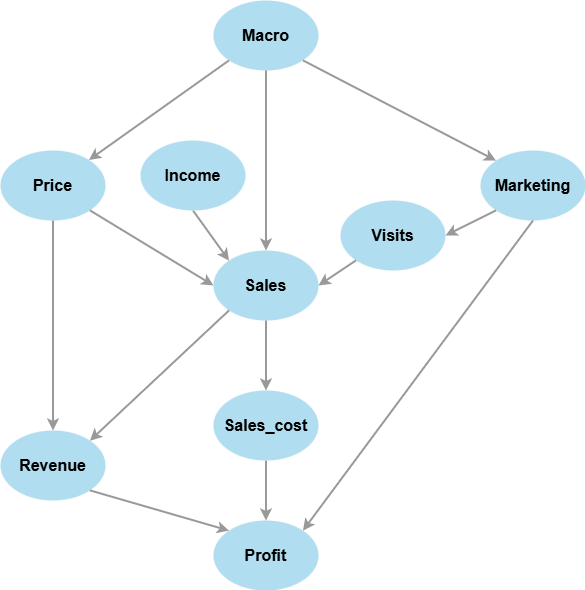

## Generate the data

In [4]:

np.random.seed(3)

# Generate customers' Ids 
Id = pd.Series(range(1,1001))

# Generate Income variable 
#Income = np.random.choice(["Low", "Medium", "High"], size=1000, p=[0.5, 0.35, 0.15])
Income = np.random.choice([1, 2, 3], size=1000, p=[0.5, 0.35, 0.15])


data = pd.DataFrame({"Id": Id, "Income": Income})

# Generate dates 
Year = pd.Series(range(2020,2024))

# Create the product of Ids and Years
year = pd.DataFrame({'Year': Year})
data = year.merge(data, how='cross')

# Generate Macro variable 
data["Macro"] = np.where(((data.Year==2022) | (data.Year==2020)), 1, 0)

# Create Price variable 
data['Price'] = 10 + 2 * data.Macro + np.random.normal(loc=0, scale=0.5, size=4000) 

# Create other variables 
data['Marketing'] = 80 - 10 * data.Macro + np.random.normal(loc=2, scale=1, size=4000) 
data['Visits'] = 0.1 * data.Marketing + np.random.normal(loc=0, scale=0.5, size=4000) 

data['Sales'] = 80 + 28 * data.Macro + 14 * data.Income - 7 * data.Price + 4 * data.Visits + np.random.normal(loc=0, scale=5, size=4000)


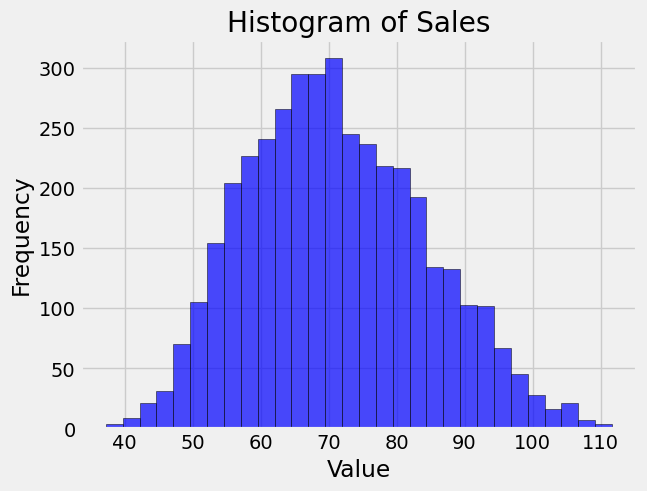

In [5]:
# Create the histogram of Sales
data['Sales'].plot.hist(bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Sales')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show();

In [6]:
# Add Costs, Revenue and Profit variables
np.random.seed(3)

data['Sales_costs'] = 2 * data['Sales']
data['Revenue'] = data['Price'] * data['Sales']
data['Profit'] = data['Revenue'] - data['Sales_costs'] - data['Marketing']
data

,Year,Id,Income,Macro,Price,Marketing,Visits,Sales,Sales_costs,Revenue,Profit
0,2020,1,2,1,11.533538,72.094951,7.075015,76.554808,153.109616,882.947797,657.743230
1,2020,2,2,1,11.379815,72.771135,7.546317,81.907456,163.814911,932.091671,695.505624
2,2020,3,1,1,12.328957,71.592682,7.166274,63.224312,126.448625,779.489813,581.448506
3,2020,4,2,1,11.083863,70.461982,7.726431,88.219790,176.439580,977.816034,730.914472
4,2020,5,3,1,12.481636,72.892739,7.627296,95.304669,190.609338,1189.558144,926.056067
...,...,...,...,...,...,...,...,...,...,...,...
3995,2023,996,1,0,9.260586,83.325293,7.720457,65.571514,131.143028,607.230614,392.762293
3996,2023,997,2,0,9.671375,80.500423,7.398084,75.226449,150.452898,727.543214,496.589893
3997,2023,998,1,0,10.253770,84.987198,8.955990,54.026211,108.052422,553.972319,360.932699
3998,2023,999,1,0,10.010943,80.666618,8.300839,55.538238,111.076476,555.990114,364.247020


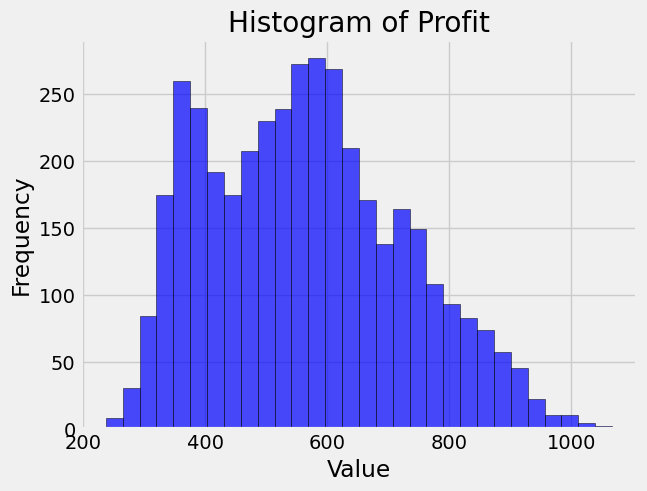

In [7]:
# Create the histogram of Profit
data['Profit'].plot.hist(bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Profit')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show();